## This notebook shows how to hash pictures and test the reliability of the hashing.

In [20]:
#If you don't have the necessary libraries, just pip install PIL or pillow depending on your OS.

from PIL import Image
import hashlib

md5hash = hashlib.md5(Image.open('test.jpg').tobytes())
print(md5hash.hexdigest())

30f9ce9b286a94d2879d17877764f229


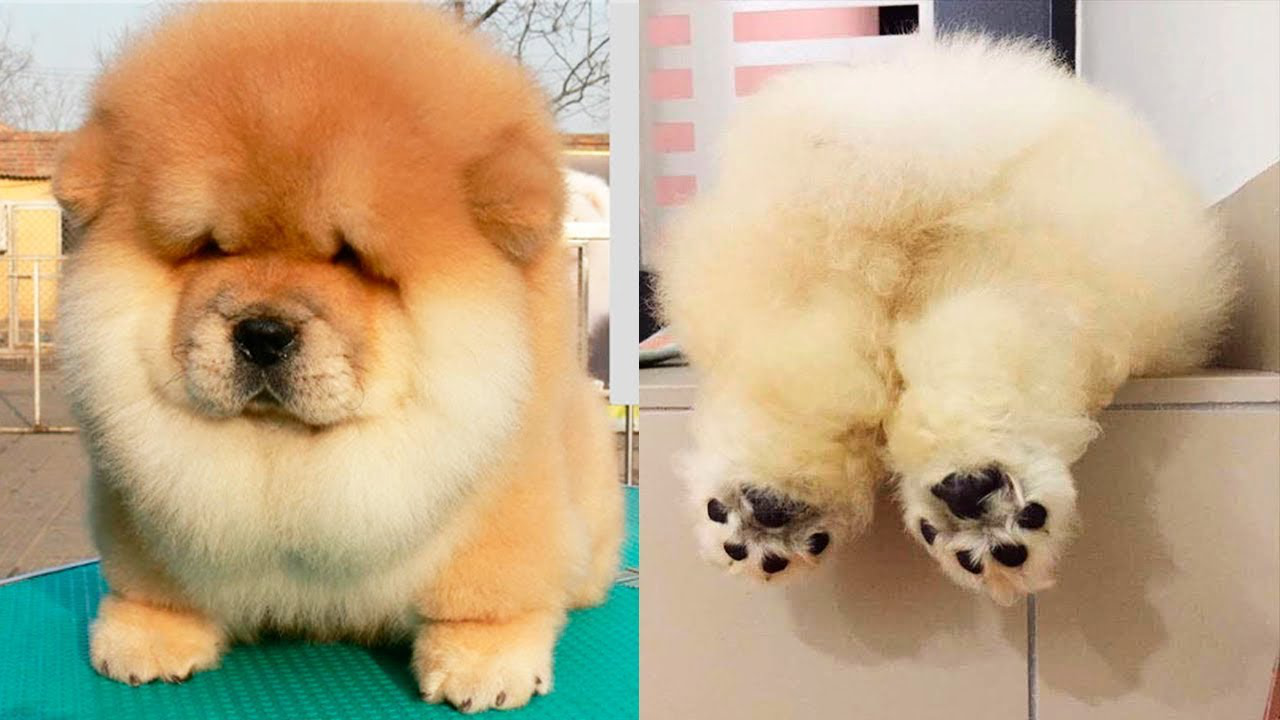

In [19]:
#Just in case you want to take a look at the photo
Image.open("test.jpg")

#### What if you want to hash many pictures in the same directory. 
#### A lot of the photos or images in the same album may share the same prefix with different numbering.

In [21]:
#The code below shows how to store all the hash values of all the pictures which share the nameing prefix in the same directory
#into one list.

hash_list = []
pre = "C:\Everything Home\Photo Albums\IMG"
for num in range(1, 150):
    hash_list.append(hashlib.md5(Image.open(pre+ "{:04d}".format(num) + '.jpg').tobytes()).hexdigest())
hash_list

['15a541d866799294c245779ce38c3657',
 '4a21044d9838ef4a5603347bda5309b6',
 'dbea58c70debba3ef199739ee05e9244',
 '4a48188e22491f8c7111449ae1e6d973',
 '7932b3b968d2715164cd429e4a6e4782',
 '50ccbcd1645acb94cc8a102b29cd6b20',
 'd5d0fb40f23ab261fb7d2c445e62f658',
 '46a4ba1dd4e1980261ff7bc79a85634d',
 '414d9157c02f78824590324248a3eada',
 '0de3d00b600d700635e97fa2ad884b0e',
 '54b8461cf19adee8f1930de3bea903c1',
 'ebbfeb35e0fc1177100a1c06f99b7927',
 '8852778ec5b499ae2c728243dfaa7c13',
 '5f609ce4a4e94a65b40baf645ae1b5b6',
 'fcc489576c5960f438ddd78d930b483a',
 'bc99135fb7c7b935da5e7ea216b3eb2e',
 '24dc3f9d67eafc533c2c04649a7b7d89',
 'c3a389c7959373f316f8db9521ef0bb1',
 '4760ae2dd108f3bd16752b721722de4d',
 '8fcc37db1de0b025e45032a2f2b5038a',
 '0442749dc65284e04c8e6cf5d2b1035c',
 '911ec2b6dfdc31c42abb16f5b86b8ad1',
 '49a4e08172531c601ef7ff77f0590720',
 '40e91c884a6ec7bc890f773ebddd1168',
 'c6e62913a7bc32923eec229678476365',
 '6e78e0e320622f33267b3b9f8c711a45',
 'b602481c077cb88e764e285c313cc5ea',
 

In [23]:
#Just to confirm that there is definitely no duplicate value.

from collections import Counter

d1 = Counter(hash_list)
{k:v for (k,v) in d1.items() if v > 1}

{}

Empty result. Perfect. This shows each unique picture indeed returns a unique hash.

#### But what if all the pictures are just dumped in the folder and the names share no prefix or suffix?

#### Then how shall we iterate through all the files?

### Keep on reading!

In [25]:
#The 2 libraries below are needed.
#Although hashlib has already been imported. To clarify things, we put it in the code again.
import hashlib, os

hasher_list = []
for root, dirs,files in os.walk("C:\Everything Home\Photo_dump", topdown=True):
    for name in files:
        #print(os.path.join(root, name))
        FileName = (os.path.join(root, name))

        hasher = hashlib.md5()
        with open(str(FileName), 'rb') as afile:
            buf = afile.read()
            hasher.update(buf)
        hasher_list.append(hasher.hexdigest())

In [26]:
len(hasher_list)

2072

#### Okay, how do you know the same picture will have the same hash when the directory is changed?

### Let's check

In [9]:
md5hash = hashlib.md5(Image.open("C:\Everything Home\Programming\CV\Training\test0001.jpg").tobytes())
print(md5hash.hexdigest())
md5hash = hashlib.md5(Image.open("C:\CreatedJustForTesting\test0001.jpg").tobytes())
print(md5hash.hexdigest())

15a541d866799294c245779ce38c3657
15a541d866799294c245779ce38c3657


### Done!